In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
max_features = 20000  # 只考慮 20000 個字彙
maxlen = 200  # 每則影評只考慮前 200 個字
epochs = 2

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(f'訓練資料筆數：{len(x_train)}')
print(f'測試資料筆數：{len(x_test)}')

# 不足長度，後面補0
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/gimme/Conda/envs/Conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/gimme/Conda/envs/Conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shape

In [5]:
# 可輸入不定長度的整數陣列
inputs = keras.Input(shape=(None,), dtype="int32")

x = layers.Embedding(max_features, 128)(inputs)
# 使用 2 個 LSTM
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 64)          49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,642,497
Trainable params: 2,642,497
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history=model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_split=0.1)

Epoch 1/2
704/704 [==============================] - 42s 59ms/step - loss: 0.4983 - accuracy: 0.7395 - val_loss: 0.3431 - val_accuracy: 0.8620
Epoch 2/2
704/704 [==============================] - 43s 61ms/step - loss: 0.2020 - accuracy: 0.9239 - val_loss: 0.3394 - val_accuracy: 0.8820


In [7]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 8s 10ms/step - loss: 0.3599 - accuracy: 0.8670


[0.3599429428577423, 0.8669999837875366]

In [10]:
# 可輸入不定長度的整數陣列
inputs_gru = keras.Input(shape=(None,), dtype="int32")

x_gru = layers.Embedding(max_features, 128)(inputs_gru)
# 使用 2 個 LSTM
x_gru = layers.GRU(64, return_sequences=True)(x_gru)
x_gru = layers.GRU(64)(x_gru)

outputs_gru = layers.Dense(1, activation="sigmoid")(x_gru)
model_gru = keras.Model(inputs_gru, outputs_gru)
model_gru.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_2 (GRU)                  (None, None, 64)          37248     
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,622,273
Trainable params: 2,622,273
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_gru.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history_gru=model_gru.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_split=0.1)

Epoch 1/2
704/704 [==============================] - 547s 775ms/step - loss: 0.5091 - accuracy: 0.7290 - val_loss: 0.3399 - val_accuracy: 0.8608
Epoch 2/2
704/704 [==============================] - 510s 725ms/step - loss: 0.1907 - accuracy: 0.9303 - val_loss: 0.3019 - val_accuracy: 0.8744


In [12]:
model_gru.evaluate(x_test, y_test)

782/782 [==============================] - 127s 163ms/step - loss: 0.3210 - accuracy: 0.8672


[0.3209761083126068, 0.8671600222587585]

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def draw(model_history):
    plt.figure(0)
    plt.plot(model_history.history['accuracy'],'r')
    plt.plot(model_history.history['val_accuracy'],'g')
    plt.xticks(np.arange(0, 2, 1.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])

    plt.figure(1)
    plt.plot(model_history.history['loss'],'r')
    plt.plot(model_history.history['val_loss'],'g')
    plt.xticks(np.arange(0, 2, 1.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])

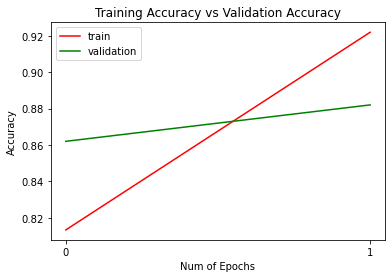

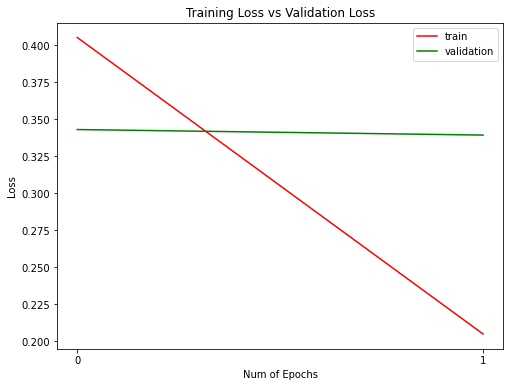

In [18]:
draw(history)

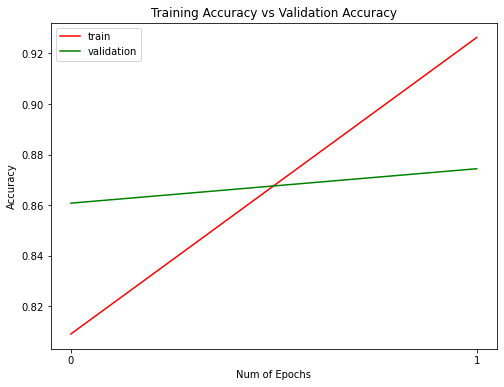

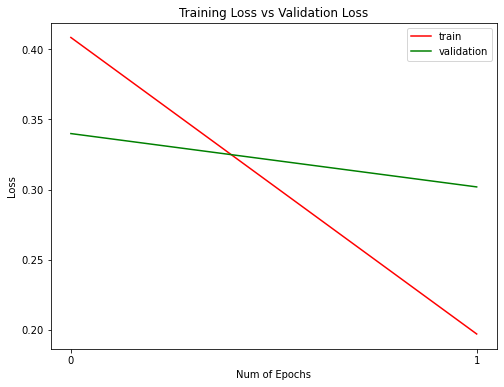

In [19]:
draw(history_gru)